## 모듈 임포트

In [61]:
import face_recognition
import os
from PIL import Image
import cv2


%matplotlib inline
import matplotlib.pyplot as plt

In [62]:
dir_path = './data/E12_image/'
path_to_save = './data/grop_img/'

## 얼굴 영역 자르기

In [63]:
def get_gropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]

    return cropped_face

In [64]:
def get_gropped_face_save(dir_path, path_to_save):
    file_list = os.listdir(dir_path)
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_gropped_face(img_path)
        pillow_image = Image.fromarray(face)
        pillow_image.save(path_to_save + os.path.splitext(file)[0])
            
# get_gropped_face_save(dir_path, path_to_save)

## 얼굴 영역의 임베딩 추출하기

In [65]:
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

In [28]:
import matplotlib.image as mpimg

In [66]:
def get_face_embedding_dict(path_to_save):
    file_list = os.listdir(path_to_save)
    embedding_dict = {}
    for file in file_list:
        img_path = os.path.join(path_to_save, file)
        face = mpimg.imread(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                    # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
    return embedding_dict

In [67]:
embedding_dict = get_face_embedding_dict(path_to_save)

## 모은 연예인들과 비교하기

In [68]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

In [69]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

In [70]:
def get_nearest_face(name, top=4):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
    return sorted_faces, sort_key_func, 

In [75]:
sorted_faces, key = get_nearest_face('내사진1', 5)

순위 1 : 이름(조정석), 거리(0.40522479709685355)
순위 2 : 이름(김희철), 거리(0.40805388909179097)
순위 3 : 이름(옥택연), 거리(0.4083904141299354)
순위 4 : 이름(박정민), 거리(0.41206047518315986)
순위 5 : 이름(RM), 거리(0.4141813891660954)


## 다양한 재미있는 시각화 시도해 보기

연예인 닮은 꼴 찾기 1번째  결과 : 조정석
연예인 닮은 꼴 찾기 2번째  결과 : 김희철
연예인 닮은 꼴 찾기 3번째  결과 : 옥택연
연예인 닮은 꼴 찾기 4번째  결과 : 박정민
연예인 닮은 꼴 찾기 5번째  결과 : RM


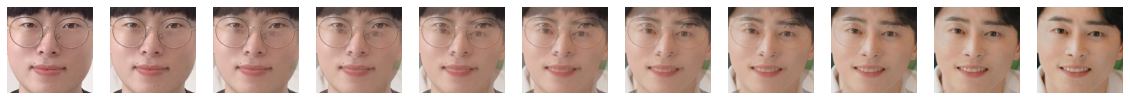

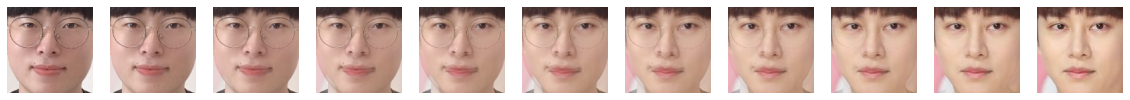

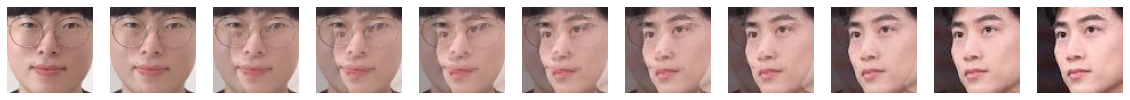

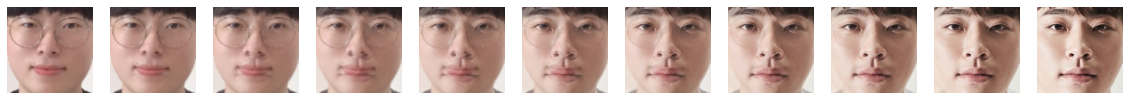

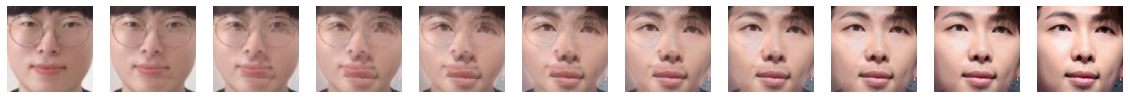

In [81]:

img2 = cv2.imread(path_to_save + '내사진1.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

for k in range(5):
    a = 0.0
    i = 0

    fig, axes = plt.subplots(1, 11, figsize=(20, 20))
    
    img1 = cv2.imread(path_to_save + sorted_faces[k+1][0] + '.jpg')
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    
    print('연예인 닮은 꼴 찾기 {}번째  결과 : {}'.format(k+1 , sorted_faces[k+1][0]))
    
    while(i < 11):
        # 블렌딩하는 두 이미지의 크기가 같아야함
        width = img1.shape[1]
        height = img1.shape[0]
        img2 = cv2.resize(img2, (width, height))

        # img1 사진은 점점 투명해지고 img2 사진은 점점 불투명해짐
        b = 1.0 - a
        dst1 = cv2.addWeighted(img1, a, img2, b, 0)
        axes[i].imshow(dst1)
        axes[i].axis('off')
        a = a + 0.1
        i = i +1

## 마무리

시각화한 결과 변하는 양상이 눈에 보입니다.  
연예인 얼굴 찾기 어플의 동작 원리를 이해했습니다.  
opencv를 활용해서 다양한 효과를 준다면 더 좋을 것 같다는 생각이 들었습니다.  